In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
loan=pd.read_csv("loan.csv")
print(loan.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

C:\Users\Aashish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning
### 1) Deleting unwanted rows
Deleting unwanted rows on the basis of preliminary study of the data set and the provided data dictionary.

In [3]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [4]:
#clearly some of the columns have lot of missing values
print(loan.shape)
loan=loan.drop(["url","desc","title","zip_code","addr_state","initial_list_status","out_prncp_inv","total_pymnt_inv","total_rec_prncp","total_rec_int","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy","bc_util","chargeoff_within_12_mths","delinq_amnt","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq","num_accts_ever_120_pd","num_actv_bc_tl","num_bc_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","tax_liens","tot_hi_cred_lim","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"],axis=1)
print(loan.shape)
print(loan.head)

(39717, 111)
(39717, 36)
<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... pub_rec  \
0       36 months   10.65%      

re-fromating the left over columns to help us derive useful information.

In [5]:
def year2range(x):
    x=str(x)
    y=""
    if ("1 " in x) or ("2 " in x):
        y="0-2"
    elif ("3 " in x) or ("4 " in x):
        y="2-4"
    elif ("5 " in x) or ("6 " in x):
        y="4-6"
    else:
        y="6+"
    return y

In [6]:
def str2year(x):
    x=x.split('-')[1]
    if int(x[0])>=3:
        x="19"+x
    else:
        x="20"+x
    x=int(x)
    x=2021-x
    return x

In [7]:
#converting the term columns to integers 
loan.term=loan.term.apply(lambda x:int(x.split(' ')[1]))
#removing % from the interest rate and converting it to float type for analysis
loan.int_rate=loan.int_rate.apply(lambda x:float(x.strip('%')))
# converting emp_length to 4 categorical ranges
loan.emp_length=loan.emp_length.apply(year2range)
# getting age of loan issue date from the loan issue date
loan.issue_d=loan.issue_d.apply(str2year)
# converting earliest_cr_line from string to age of earliest_cr_line
loan.earliest_cr_line=loan.earliest_cr_line.apply(str2year)
#renaming the columns
loan.rename(columns={'issue_d':'issue_age','earliest_cr_line':'credit_line_age'}, inplace = True)
# removing mths_since_last_delinq as it is 65% na
print(((loan.mths_since_last_delinq.isna().sum())/len(loan.mths_since_last_delinq))*100)
loan=loan.drop(['mths_since_last_delinq'],axis=1)
# removing mths_since_last_delinq as it is 65% na
print(((loan.mths_since_last_record.isna().sum())/len(loan.mths_since_last_record))*100)
loan=loan.drop(['mths_since_last_record'],axis=1)
# removing pub_rec from the dataframe as 95% values are 0
loan=loan.drop(['total_rec_late_fee'],axis=1)
# removing recoveries from the dataframe as 95% values are 0
loan=loan.drop(['recoveries'],axis=1)
# removing out_prncp from the dataframe as 97% values are 0
loan=loan.drop(['out_prncp'],axis=1)
#since 1.75% of pub_rec_bankruptcies are NA we are removing them
print(loan.shape)
loan=loan[loan.pub_rec_bankruptcies.notna()]
print(loan.shape)
print(loan.head())

64.66248709620565
92.98537150338646
(39717, 31)
(39020, 31)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   

   int_rate  installment grade sub_grade  ... credit_line_age inq_last_6mths  \
0     10.65       162.87     B        B2  ...              36              1   
1     15.27        59.83     C        C4  ...              22              5   
2     15.96        84.33     C        C5  ...              20              2   
3     13.49       339.31     C        C1  ...              25              1   
4     12.69        67.79     B        B5  ...              25              0   

  open_acc  pub_rec revol_

## Univariate analysis

In [8]:
print(loan.shape)
#some information would not be available at the time of loan enquiry and hence should be removed
loan=loan.drop(["delinq_2yrs","credit_line_age","issue_age","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","total_pymnt","num_actv_rev_tl"],axis=1)
print(loan.shape)
print(loan.columns)
#examining the loan_status distribution
df=loan.groupby('loan_status')
print(df.loan_status.count())

(39020, 31)
(39020, 20)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')
loan_status
Charged Off     5509
Current         1140
Fully Paid     32371
Name: loan_status, dtype: int64


In [9]:
# The values marked as current are neither fully paid nor have defaulted and hence are not useful for the analysis
loan=loan[loan['loan_status']!='Current']
print(loan.shape)
#converting the rest two variables into binary
loan.loan_status=loan.loan_status.apply(lambda x:0 if x=='Fully Paid' else x)
loan.loan_status=loan.loan_status.apply(lambda x:1 if x=='Charged Off' else x)
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))
loan['loan_status'].value_counts()

(37880, 20)


C:\Users\Aashish\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Aashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    32371
1     5509
Name: loan_status, dtype: int64

In [10]:
def plt_cat(data):
    sns.barplot(x=data,y=loan.loan_status,data=loan)
    plt.show()

In [11]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

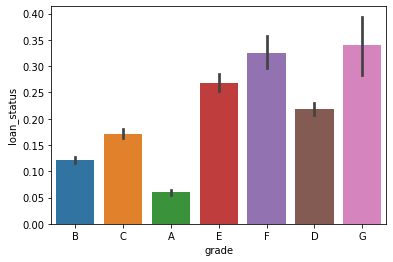

In [12]:
#plotting categorical variables first
plt_cat(loan.grade)

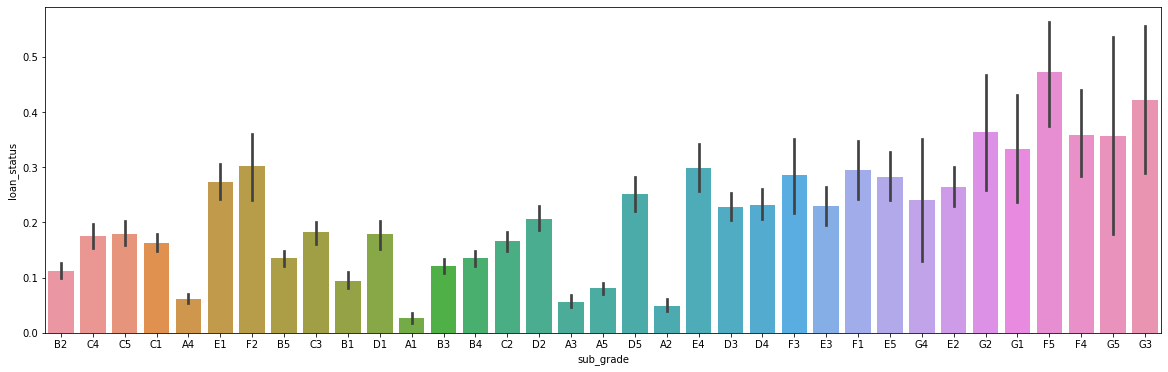

In [13]:
plt.figure(figsize=(20,6))
plt_cat(loan.sub_grade)
#lower grades / subgrades are likely to default

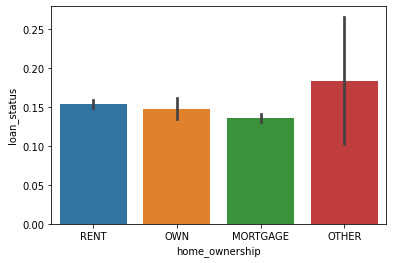

In [14]:
plt_cat(loan.home_ownership)
#no pattern is observed in home ownership and the likliness to default

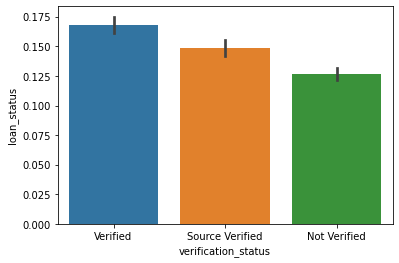

In [15]:
plt_cat(loan.verification_status)
# verified are more likely to default

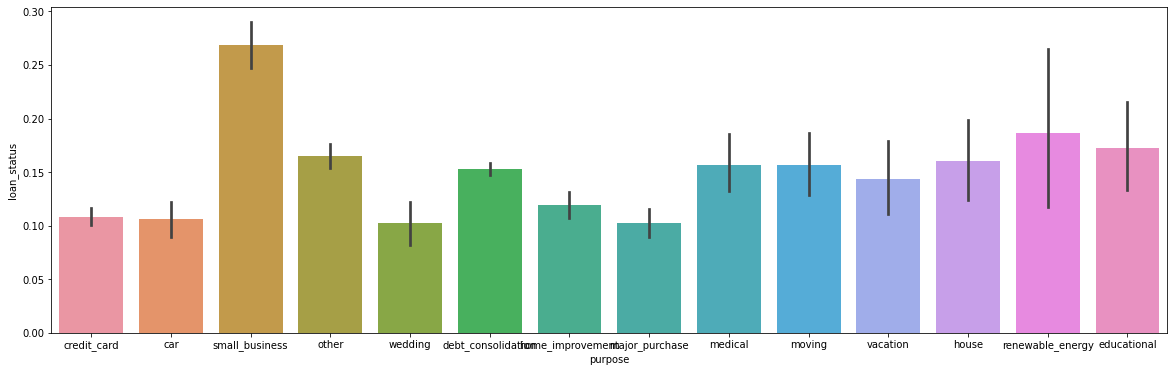

In [16]:
plt.figure(figsize=(20,6))
plt_cat(loan.purpose)
# loans for small buisness are more likely to default

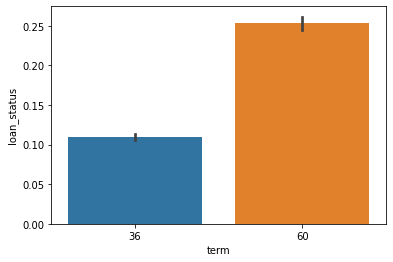

In [17]:
plt_cat(loan.term)
#long term loans are likely to default

The easiest way to analyse quantitative values is to convert them into categorical variables

In [18]:
def categorizer(num,x):
    #x=loan.iloc[:,i].median()
    y=x/2
    z=x+y
    val="low"
    if 0<=num<y:
        val="low"
    elif y<=num<x:
        val="medium"
    elif x<=num<z:
        val="high"
    elif num>z:
        val="very high"
    return val

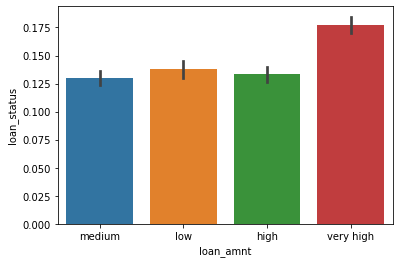

In [19]:
loan.loan_amnt=loan.loan_amnt.apply(lambda x:categorizer(x,loan.loan_amnt.median()))
loan.loan_amnt.value_counts()
plt_cat(loan.loan_amnt)
# very high loan amounts are more likely to default

medium       11676
very high    10407
high          8533
low           7264
Name: funded_amnt_inv, dtype: int64


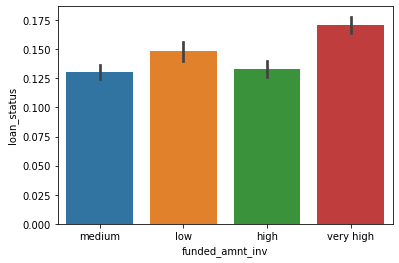

In [20]:
loan.funded_amnt_inv=loan.funded_amnt_inv.apply(lambda x:categorizer(x,loan.funded_amnt_inv.median()))
print(loan.funded_amnt_inv.value_counts())
plt_cat(loan.funded_amnt_inv)
# just like loan amount very high funded amount invested are more likely to default

medium       17863
high         16499
very high     2535
low            983
Name: int_rate, dtype: int64


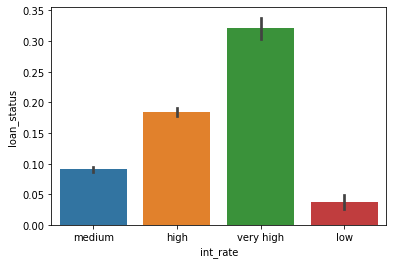

In [21]:
loan.int_rate=loan.int_rate.apply(lambda x:categorizer(x,loan.int_rate.median()))
print(loan.int_rate.value_counts())
plt_cat(loan.int_rate)
# loans with very high interest rates are more likely to default

medium       12033
very high     9800
high          9140
low           6907
Name: installment, dtype: int64


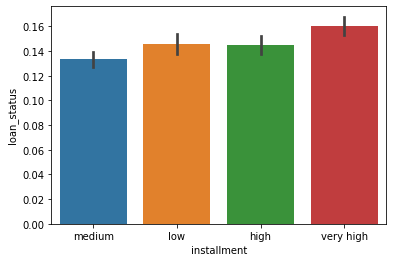

In [22]:
loan.installment=loan.installment.apply(lambda x:categorizer(x,loan.installment.median()))
print(loan.installment.value_counts())
plt_cat(loan.installment)
# the higher the installment amount, the higher the default rate

6+     13710
0-2    11625
2-4     7248
4-6     5297
Name: emp_length, dtype: int64


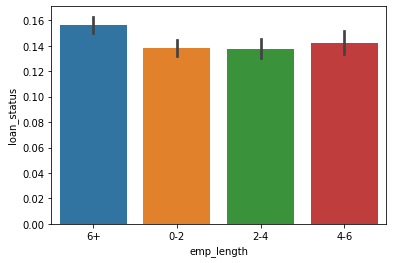

In [23]:
#loan.emp_length=loan.emp_length.apply(lambda x:categorizer(x,loan.emp_length.median()))
print(loan.emp_length.value_counts())
plt_cat(loan.emp_length)
# not much predictor of default

medium       15325
high         10945
very high     8000
low           3610
Name: annual_inc, dtype: int64


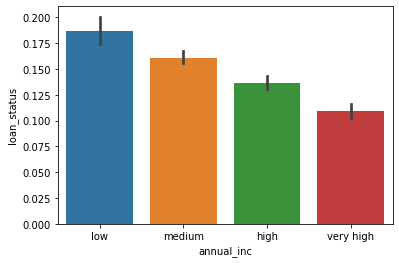

In [24]:
loan.annual_inc=loan.annual_inc.apply(lambda x:categorizer(x,loan.annual_inc.median()))
print(loan.annual_inc.value_counts())
plt_cat(loan.annual_inc)
# lower annual income are more likely to default

high         11991
medium       11750
low           7181
very high     6958
Name: dti, dtype: int64


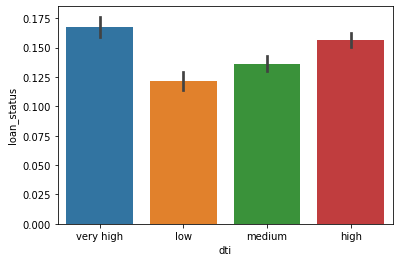

In [25]:
loan.dti=loan.dti.apply(lambda x:categorizer(x,loan.dti.median()))
print(loan.dti.value_counts())
plt_cat(loan.dti)
# higher dti have higher risk of default

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


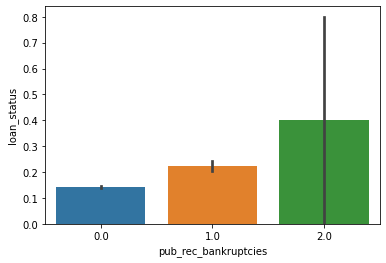

In [26]:
#loan.pub_rec_bankruptcies=loan.pub_rec_bankruptcies.apply(lambda x:categorizer(x,loan.pub_rec_bankruptcies.median()))
print(loan.pub_rec_bankruptcies.value_counts())
plt_cat(loan.pub_rec_bankruptcies)
# higher public recorded backruptancies have higher risk of default

## Segmented univariate analysis
In the following steps we would be analysing the data upon the purpose of the loan since it is the variable that is affecting most of the other data elements.

debt_consolidation    17764
credit_card            4929
other                  3760
home_improvement       2827
major_purchase         2131
small_business         1701
car                    1482
wedding                 907
medical                 672
moving                  567
vacation                369
house                   362
educational             307
renewable_energy        102
Name: purpose, dtype: int64


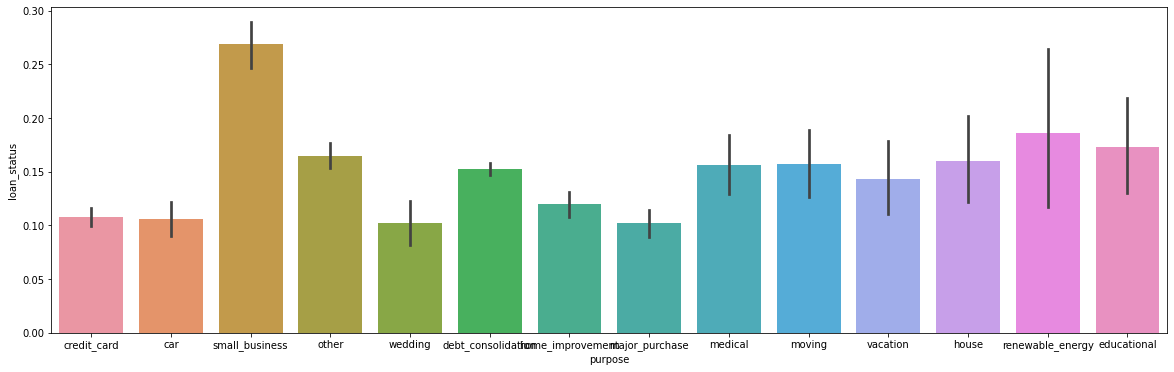

In [27]:
plt.figure(figsize=(20,6))
print(loan.purpose.value_counts())
plt_cat(loan.purpose)

In [28]:
# focussing on top four categories
top_four=["debt_consolidation","credit_card","other","home_improvement"]
loan=loan[loan.purpose.isin(top_four)]
print(loan.purpose.value_counts())

debt_consolidation    17764
credit_card            4929
other                  3760
home_improvement       2827
Name: purpose, dtype: int64


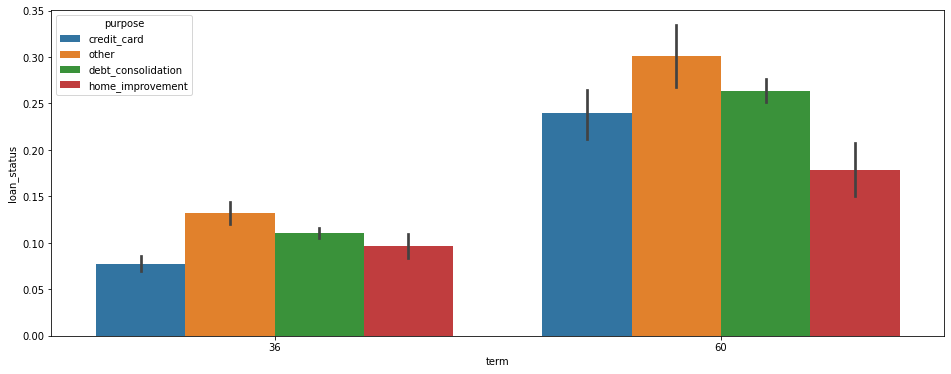

In [29]:
def plot_segmented(cat_var):
    plt.figure(figsize=(16,6))
    sns.barplot(x=cat_var,y="loan_status",hue='purpose',data=loan)
    plt.show()
    
plot_segmented('term')
#in each of the terms the purpose "other" are more likely to default

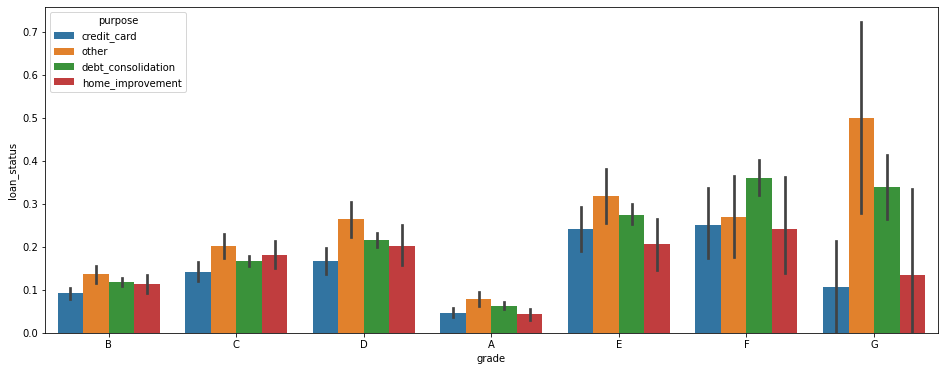

In [30]:
plot_segmented('grade')
#in each of the terms the grade "other" are more likely to default folllowed by debt_consolidation

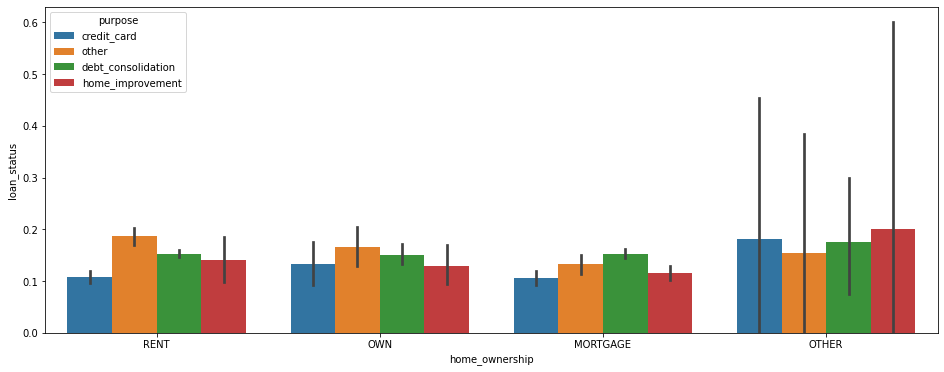

In [31]:
plot_segmented('home_ownership')

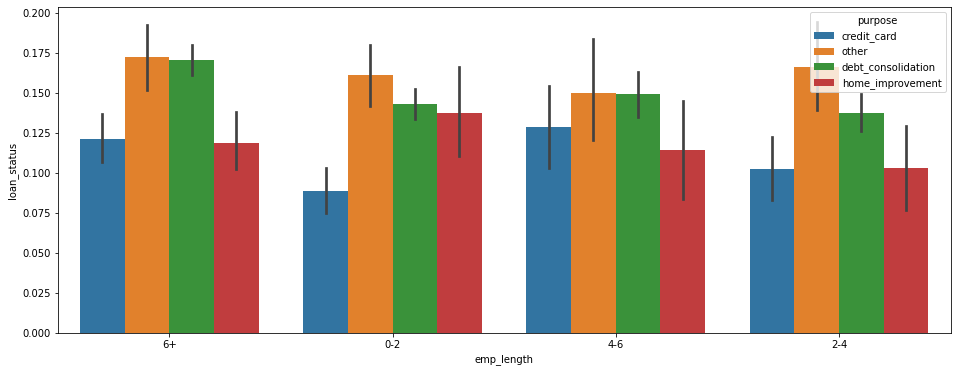

In [32]:
plot_segmented('emp_length')

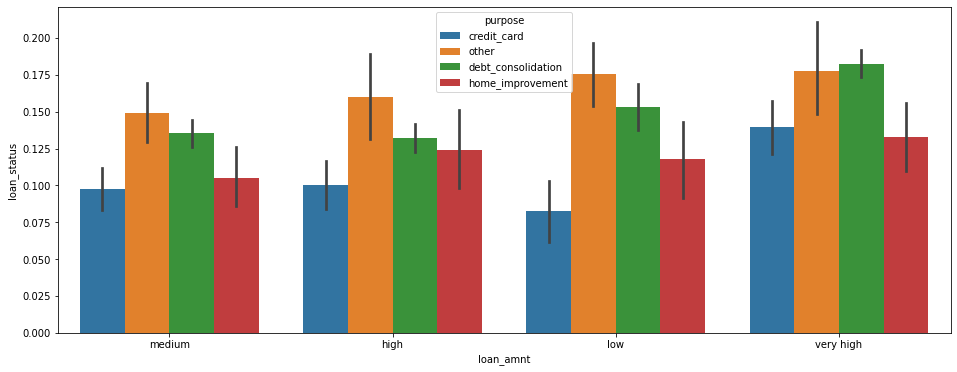

In [33]:
plot_segmented('loan_amnt')

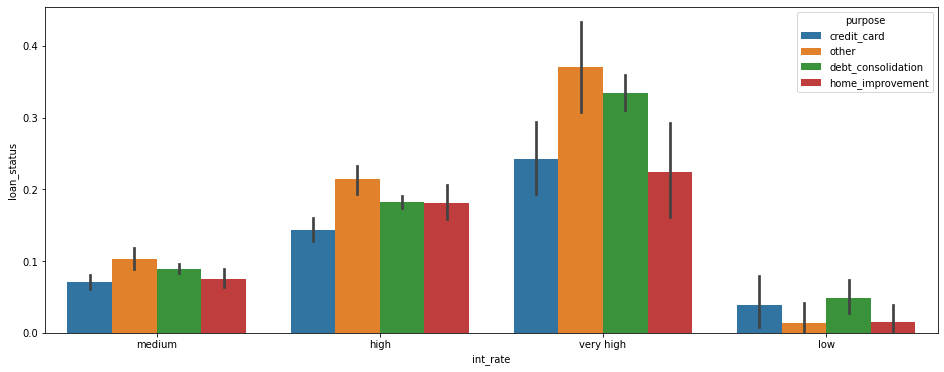

In [34]:
plot_segmented('int_rate')

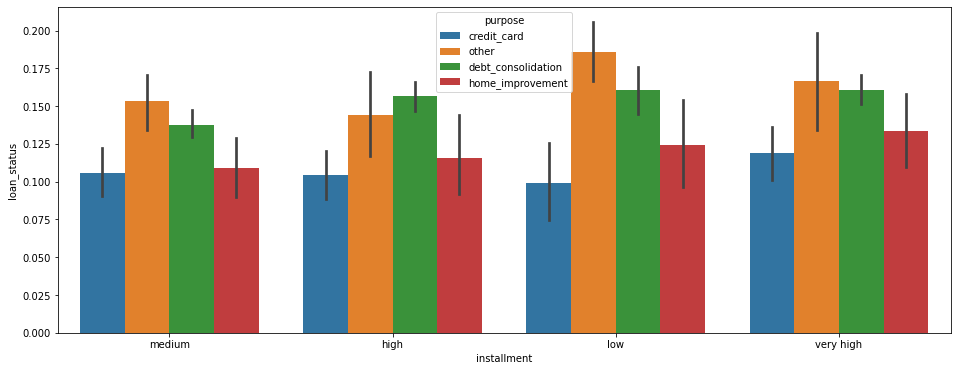

In [35]:
# installment
plot_segmented('installment')

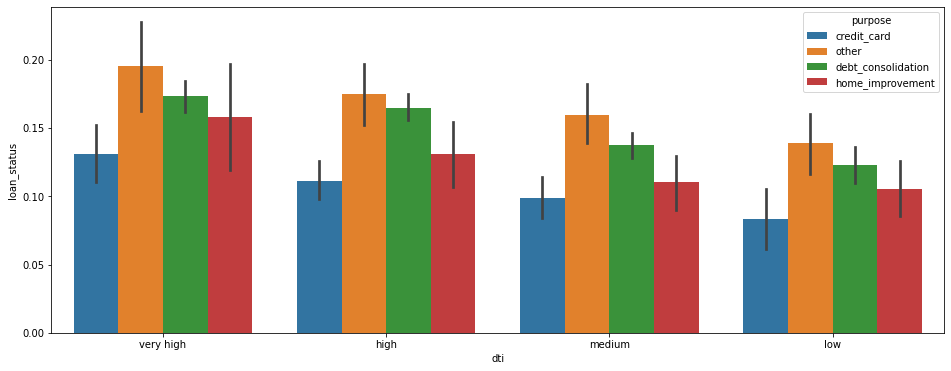

In [36]:
plot_segmented('dti')

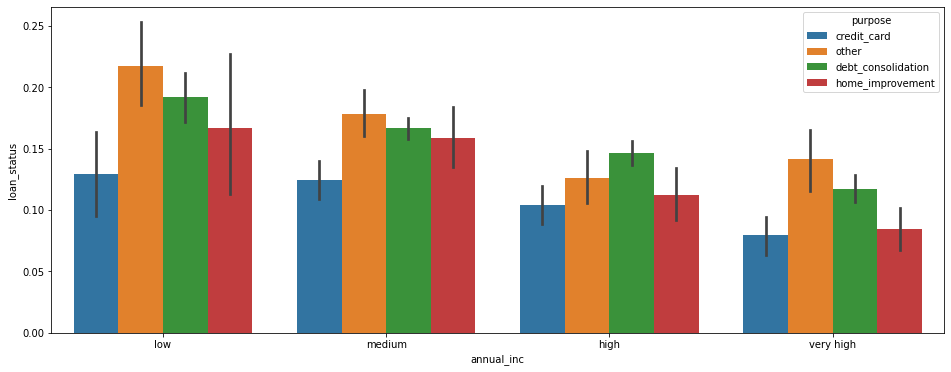

In [37]:
plot_segmented('annual_inc')

Throughout categories the ones with purpose "other" are more likely to default

## Observing the correlation of loan_status with other variables using corelation matrix

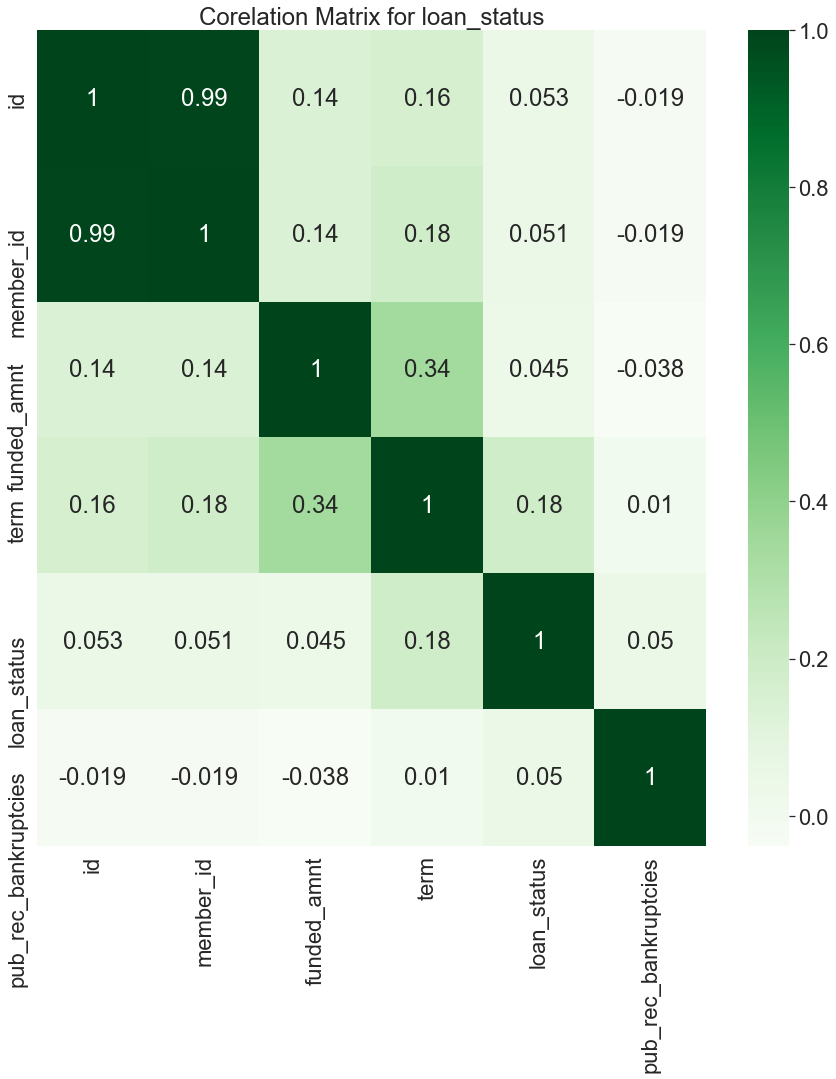

In [41]:
plt.figure(figsize=(15, 15))
#sns.set(font_scale=2)
plt.title('Corelation Matrix for loan_status')
corr = loan.corr(method='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Greens", annot=True)